In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

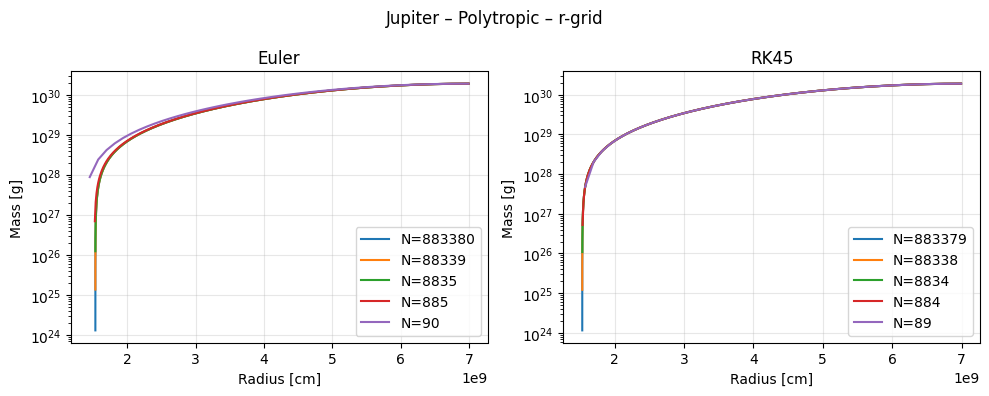

In [27]:
def load_data():

    datas_euler = []
    datas_RK45 = []

    for N in ['1e2', '1e3', '1e4', '1e5', '1e6'][::-1]:
        file_path = os.path.join('data', 'simulation_results', 'plot_1', 'Euler', f'{N}.csv')
        datas_euler.append(np.loadtxt(file_path, skiprows=1, delimiter=','))
        
        file_path = os.path.join('data', 'simulation_results', 'plot_1', 'RK45', f'{N}.csv')
        datas_RK45.append(np.loadtxt(file_path, skiprows=1, delimiter=','))

    return datas_euler, datas_RK45

def plot_data(datas_euler, datas_RK45):
    # ------------------- plot ------------------
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    for data_E, data_R in zip(datas_euler, datas_RK45):
        N = len(data_E)
        axs[0].plot(data_E[:,0], data_E[:,1], label=f'N={N}')
        axs[0].set_yscale('log')
        axs[0].set_xlabel('Radius [cm]')
        axs[0].set_ylabel('Mass [g]')
        axs[0].set_title('Euler')
        axs[0].grid(True, alpha=0.3)
        axs[0].legend()

        N = len(data_R)
        axs[1].plot(data_R[:,0], data_R[:,1], label=f'N={N}')
        axs[1].set_yscale('log')
        axs[1].set_xlabel('Radius [cm]')
        axs[1].set_ylabel('Mass [g]')
        axs[1].set_title('RK45')
        axs[1].grid(True, alpha=0.3)
        axs[1].legend()
    
    plt.suptitle('Jupiter \u2013 Polytropic \u2013 r-grid')
    plt.tight_layout()

    file_name = 'plot_1_different_N.pdf'

    folder_path = os.path.join('plots')
    file_path = os.path.join(folder_path, file_name)
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(file_path)

    plt.show()
    plt.close()

datas_euler, datas_RK45 = load_data()
plot_data(datas_euler, datas_RK45)